In [118]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [119]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [120]:
print(len(training_data))

60000


In [121]:
print(len(test_data))

10000


In [122]:
image, label = training_data[0]

In [123]:
print(label)

9


In [124]:
image.shape

torch.Size([1, 28, 28])

In [125]:
test_data.size

AttributeError: 'FashionMNIST' object has no attribute 'size'

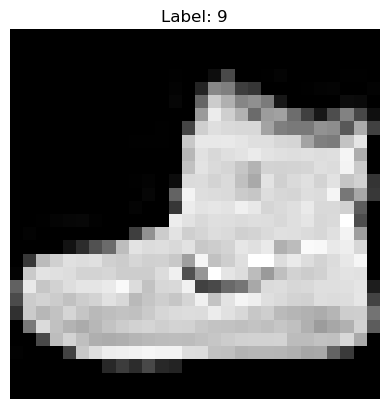

In [126]:
# Plot the image
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()

In [127]:
batch_size = 64
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)
for X, y in test_dataloader:
    print(X.shape) 
    print(y.shape)
    break

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [128]:
# lets print our accelerator cuda-gpu, if that is not found go for cpu
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"using device {device}") # we are using gpu

using device cuda


In [129]:
# the images have 1 channel(not rgb which has 3 channels) 28 by 28 pixels (height by width)

In [130]:
#define model
class Custom_Neural_Network_(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_layers_with_relu = nn.Sequential(
            nn.Linear(1 * 28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_layers_with_relu(x)
        return logits

In [131]:
model = Custom_Neural_Network_().to(device)

In [132]:
# lets print our custom architecture
print(model)

Custom_Neural_Network_(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_layers_with_relu): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [133]:
# now we need a loss function(to calculate error) and an optimizer(or gradient descent algorithm)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3) # we are taking adam as optimizer

In [134]:
def solve():
     for batch, (X, y) in enumerate(train_dataloader):
        print("batch ", batch)
        print("labels", y)
        print()
        

In [135]:
solve()

batch  0
labels tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8,
        4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5, 2, 1, 6, 6, 7, 9, 5, 9, 2, 7, 3,
        0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5])

batch  1
labels tensor([0, 2, 0, 0, 4, 1, 3, 1, 6, 3, 1, 4, 4, 6, 1, 9, 1, 3, 5, 7, 9, 7, 1, 7,
        9, 9, 9, 3, 2, 9, 3, 6, 4, 1, 1, 8, 8, 0, 1, 1, 6, 8, 1, 9, 7, 8, 8, 9,
        6, 6, 3, 1, 5, 4, 6, 7, 5, 5, 9, 2, 2, 2, 7, 6])

batch  2
labels tensor([4, 1, 8, 7, 7, 5, 4, 2, 9, 1, 7, 4, 6, 9, 7, 1, 8, 7, 1, 2, 8, 0, 9, 1,
        8, 7, 0, 5, 8, 6, 7, 2, 0, 8, 7, 1, 6, 2, 1, 9, 6, 0, 1, 0, 5, 5, 1, 7,
        0, 5, 8, 4, 0, 4, 0, 6, 6, 4, 0, 0, 4, 7, 3, 0])

batch  3
labels tensor([5, 8, 4, 1, 1, 2, 9, 2, 8, 5, 0, 6, 3, 4, 6, 0, 9, 1, 7, 3, 8, 5, 8, 3,
        8, 5, 2, 0, 8, 7, 0, 3, 5, 0, 6, 5, 2, 7, 5, 2, 6, 8, 2, 6, 8, 0, 4, 4,
        4, 4, 4, 1, 5, 6, 5, 3, 3, 7, 3, 3, 6, 2, 8, 4])

batch  4
labels tensor([6, 5, 9, 3, 2, 3, 2, 4, 4, 8, 2, 5, 3, 0

batch  44
labels tensor([4, 3, 9, 5, 3, 3, 4, 7, 7, 6, 7, 2, 7, 3, 2, 3, 0, 0, 9, 7, 9, 8, 9, 6,
        8, 7, 4, 6, 9, 3, 9, 6, 3, 1, 6, 9, 9, 3, 9, 6, 2, 9, 5, 4, 4, 3, 6, 6,
        7, 3, 3, 3, 7, 7, 6, 6, 5, 8, 1, 0, 2, 1, 5, 5])

batch  45
labels tensor([4, 5, 7, 8, 1, 4, 4, 0, 2, 6, 9, 3, 1, 6, 6, 7, 0, 9, 4, 9, 6, 7, 6, 7,
        7, 2, 7, 9, 5, 2, 5, 0, 2, 2, 3, 5, 4, 3, 3, 1, 6, 9, 5, 3, 4, 7, 7, 3,
        6, 2, 4, 7, 5, 1, 6, 4, 4, 3, 0, 4, 6, 4, 6, 2])

batch  46
labels tensor([0, 4, 8, 9, 7, 1, 4, 6, 5, 6, 4, 2, 5, 7, 2, 3, 0, 3, 0, 2, 6, 2, 3, 3,
        9, 1, 9, 8, 9, 1, 1, 0, 8, 6, 6, 9, 6, 1, 9, 4, 0, 6, 8, 6, 5, 1, 5, 7,
        5, 8, 0, 8, 5, 2, 9, 5, 6, 3, 2, 9, 2, 8, 6, 3])

batch  47
labels tensor([1, 0, 2, 9, 3, 5, 5, 7, 4, 2, 3, 3, 3, 5, 9, 4, 6, 5, 7, 4, 6, 4, 5, 1,
        7, 2, 5, 1, 4, 6, 9, 2, 1, 0, 6, 6, 7, 9, 1, 9, 0, 5, 0, 3, 8, 4, 4, 7,
        8, 3, 7, 1, 1, 5, 1, 2, 0, 8, 1, 3, 7, 4, 0, 1])

batch  48
labels tensor([0, 3, 2, 3, 0, 6, 0, 0, 8, 8, 9, 1,

batch  84
labels tensor([6, 5, 9, 8, 3, 3, 4, 5, 2, 5, 1, 9, 5, 4, 2, 5, 9, 2, 4, 3, 1, 0, 4, 4,
        0, 0, 0, 3, 6, 1, 7, 2, 1, 6, 8, 1, 0, 2, 5, 6, 6, 2, 4, 5, 4, 9, 3, 2,
        9, 6, 4, 9, 3, 5, 2, 9, 2, 0, 8, 7, 5, 7, 3, 0])

batch  85
labels tensor([5, 1, 6, 5, 0, 6, 9, 3, 3, 2, 1, 9, 7, 6, 9, 8, 7, 0, 3, 0, 8, 3, 4, 6,
        5, 0, 9, 4, 7, 2, 4, 9, 6, 0, 3, 5, 2, 0, 9, 1, 0, 5, 2, 9, 3, 0, 2, 8,
        8, 7, 0, 6, 2, 2, 0, 3, 4, 5, 2, 4, 7, 4, 9, 8])

batch  86
labels tensor([5, 6, 2, 2, 4, 7, 1, 0, 1, 0, 8, 4, 8, 3, 2, 1, 7, 9, 7, 7, 6, 1, 4, 8,
        6, 7, 4, 3, 6, 3, 0, 8, 7, 3, 3, 9, 8, 5, 3, 1, 1, 0, 0, 4, 8, 9, 0, 3,
        1, 4, 2, 8, 1, 4, 5, 9, 1, 0, 7, 0, 6, 3, 7, 7])

batch  87
labels tensor([4, 8, 3, 7, 6, 2, 8, 5, 3, 9, 6, 5, 3, 5, 7, 8, 4, 0, 3, 8, 1, 9, 6, 5,
        9, 2, 7, 4, 1, 7, 6, 1, 9, 9, 7, 8, 0, 1, 3, 9, 6, 3, 3, 1, 8, 7, 2, 8,
        5, 0, 4, 8, 7, 5, 6, 5, 4, 8, 6, 8, 0, 8, 6, 8])

batch  88
labels tensor([9, 7, 9, 2, 5, 1, 9, 6, 1, 1, 7, 8,

batch  122
labels tensor([1, 8, 2, 3, 7, 4, 0, 8, 6, 1, 9, 4, 1, 5, 9, 1, 2, 1, 6, 4, 7, 5, 6, 1,
        1, 1, 8, 3, 9, 2, 1, 9, 8, 6, 8, 4, 8, 2, 1, 5, 0, 4, 7, 2, 3, 9, 2, 8,
        1, 3, 9, 8, 3, 7, 9, 7, 2, 0, 8, 2, 1, 6, 8, 4])

batch  123
labels tensor([2, 2, 3, 4, 5, 5, 4, 8, 3, 3, 2, 2, 7, 4, 8, 6, 6, 7, 2, 1, 7, 1, 5, 8,
        1, 3, 6, 6, 1, 0, 3, 6, 7, 9, 6, 7, 2, 6, 5, 5, 1, 8, 1, 3, 3, 4, 9, 4,
        7, 1, 9, 4, 1, 9, 6, 7, 6, 6, 2, 1, 4, 8, 7, 9])

batch  124
labels tensor([9, 7, 5, 0, 1, 0, 1, 9, 0, 5, 6, 8, 9, 5, 2, 9, 4, 5, 9, 5, 0, 8, 0, 1,
        4, 0, 8, 7, 5, 4, 5, 8, 4, 6, 8, 5, 2, 3, 5, 0, 6, 1, 2, 0, 0, 8, 5, 9,
        7, 6, 8, 7, 2, 5, 7, 5, 3, 1, 6, 4, 5, 1, 9, 3])

batch  125
labels tensor([5, 9, 5, 4, 9, 3, 2, 3, 6, 7, 8, 6, 2, 8, 8, 4, 9, 8, 4, 6, 4, 4, 3, 2,
        6, 3, 7, 2, 9, 9, 0, 4, 4, 3, 3, 6, 6, 6, 1, 7, 6, 6, 3, 6, 3, 3, 9, 3,
        5, 6, 7, 0, 3, 7, 8, 3, 0, 0, 3, 8, 0, 5, 5, 0])

batch  126
labels tensor([9, 5, 8, 9, 4, 9, 0, 8, 2, 1, 

batch  165
labels tensor([6, 0, 0, 2, 2, 3, 1, 3, 0, 1, 2, 9, 7, 1, 0, 5, 1, 9, 1, 3, 5, 8, 7, 4,
        8, 4, 5, 6, 3, 7, 5, 7, 3, 8, 1, 4, 7, 5, 2, 0, 4, 2, 8, 7, 7, 4, 9, 2,
        3, 6, 9, 6, 7, 3, 5, 2, 9, 9, 2, 6, 0, 6, 6, 4])

batch  166
labels tensor([7, 3, 5, 7, 2, 0, 0, 6, 9, 6, 1, 3, 0, 4, 2, 1, 3, 4, 9, 5, 9, 4, 8, 0,
        5, 8, 8, 0, 4, 6, 2, 0, 4, 7, 8, 8, 4, 7, 7, 4, 5, 5, 4, 1, 7, 9, 4, 1,
        8, 5, 3, 3, 0, 5, 7, 9, 7, 1, 0, 2, 6, 5, 2, 5])

batch  167
labels tensor([9, 9, 2, 1, 9, 5, 6, 8, 2, 5, 5, 0, 3, 6, 4, 0, 1, 6, 2, 5, 5, 7, 7, 6,
        8, 2, 6, 7, 1, 7, 9, 2, 9, 3, 8, 8, 8, 0, 9, 0, 6, 3, 1, 1, 9, 6, 9, 2,
        9, 5, 9, 9, 9, 2, 8, 3, 6, 8, 6, 5, 8, 9, 5, 6])

batch  168
labels tensor([3, 7, 8, 7, 5, 8, 7, 6, 3, 7, 2, 9, 8, 0, 2, 1, 0, 6, 1, 6, 5, 6, 4, 2,
        8, 1, 9, 2, 9, 5, 6, 4, 8, 2, 3, 9, 4, 3, 3, 9, 0, 1, 5, 6, 4, 6, 5, 3,
        3, 6, 7, 9, 7, 1, 3, 7, 8, 4, 8, 4, 3, 6, 6, 4])

batch  169
labels tensor([4, 3, 2, 4, 4, 9, 7, 5, 9, 9, 

batch  204
labels tensor([9, 2, 1, 6, 2, 9, 7, 1, 2, 0, 0, 5, 9, 9, 1, 8, 2, 2, 4, 3, 8, 1, 2, 1,
        1, 5, 0, 5, 6, 2, 1, 0, 5, 4, 6, 1, 6, 2, 1, 9, 1, 5, 3, 0, 2, 1, 0, 0,
        4, 7, 2, 9, 5, 9, 0, 1, 5, 1, 6, 5, 9, 1, 4, 5])

batch  205
labels tensor([9, 0, 5, 1, 3, 5, 5, 7, 6, 6, 9, 7, 6, 3, 4, 2, 6, 0, 6, 1, 4, 7, 8, 8,
        1, 6, 8, 4, 6, 6, 1, 0, 9, 8, 1, 0, 5, 1, 1, 7, 3, 3, 7, 6, 8, 6, 8, 9,
        5, 9, 9, 9, 4, 7, 2, 7, 0, 4, 4, 8, 9, 9, 5, 8])

batch  206
labels tensor([7, 0, 8, 4, 5, 3, 3, 0, 1, 4, 5, 4, 6, 0, 7, 1, 6, 9, 2, 4, 0, 2, 7, 8,
        7, 7, 8, 7, 8, 1, 9, 3, 3, 4, 5, 2, 7, 7, 3, 7, 1, 2, 1, 6, 7, 9, 5, 2,
        1, 6, 6, 8, 9, 4, 1, 5, 0, 8, 0, 8, 8, 3, 7, 8])

batch  207
labels tensor([3, 1, 3, 5, 7, 5, 1, 8, 9, 1, 7, 3, 3, 5, 1, 3, 1, 6, 3, 3, 2, 2, 8, 5,
        3, 4, 0, 3, 3, 0, 6, 7, 3, 7, 6, 9, 8, 8, 5, 2, 0, 6, 7, 8, 2, 3, 1, 1,
        6, 2, 2, 0, 8, 7, 0, 1, 3, 3, 2, 9, 4, 1, 2, 1])

batch  208
labels tensor([7, 7, 9, 9, 7, 3, 8, 0, 2, 8, 

batch  243
labels tensor([7, 2, 3, 2, 5, 2, 9, 9, 2, 3, 4, 6, 5, 4, 9, 3, 1, 0, 6, 6, 3, 5, 5, 9,
        6, 7, 7, 4, 7, 4, 7, 1, 1, 6, 6, 5, 0, 9, 7, 3, 7, 2, 4, 3, 4, 1, 0, 5,
        5, 9, 1, 4, 5, 0, 9, 5, 8, 9, 4, 8, 5, 7, 6, 7])

batch  244
labels tensor([9, 7, 0, 0, 1, 8, 0, 1, 8, 0, 6, 0, 5, 0, 7, 3, 2, 5, 5, 7, 1, 3, 3, 2,
        5, 8, 9, 5, 0, 6, 1, 8, 9, 1, 9, 2, 3, 7, 7, 9, 7, 3, 9, 6, 8, 3, 3, 6,
        2, 6, 3, 0, 9, 1, 3, 2, 8, 3, 2, 2, 9, 8, 4, 6])

batch  245
labels tensor([6, 3, 1, 7, 0, 0, 2, 2, 1, 8, 1, 1, 4, 9, 1, 8, 5, 1, 7, 5, 2, 6, 9, 4,
        6, 5, 1, 4, 0, 5, 8, 9, 0, 2, 0, 7, 6, 2, 6, 8, 5, 1, 6, 7, 0, 4, 9, 9,
        9, 9, 7, 0, 8, 3, 6, 6, 9, 6, 2, 2, 9, 9, 8, 3])

batch  246
labels tensor([5, 1, 5, 8, 8, 5, 2, 3, 8, 5, 8, 3, 4, 0, 6, 6, 4, 4, 7, 4, 4, 7, 4, 3,
        6, 1, 7, 2, 8, 1, 9, 0, 0, 8, 6, 2, 1, 4, 4, 3, 0, 5, 0, 2, 2, 7, 7, 5,
        3, 2, 4, 6, 5, 4, 8, 5, 9, 1, 7, 1, 0, 4, 0, 9])

batch  247
labels tensor([4, 9, 7, 4, 7, 5, 7, 9, 7, 4, 

batch  283
labels tensor([3, 1, 0, 6, 4, 6, 7, 7, 7, 9, 2, 7, 8, 8, 8, 7, 8, 1, 5, 4, 8, 1, 7, 4,
        7, 0, 7, 4, 9, 2, 2, 3, 7, 7, 9, 9, 3, 2, 7, 7, 7, 6, 6, 6, 5, 4, 6, 8,
        2, 4, 3, 3, 0, 8, 6, 1, 0, 3, 3, 7, 8, 9, 7, 6])

batch  284
labels tensor([1, 0, 5, 2, 4, 6, 8, 0, 6, 8, 8, 6, 6, 4, 4, 5, 6, 5, 5, 8, 3, 7, 6, 9,
        3, 1, 3, 9, 7, 0, 7, 8, 6, 7, 6, 8, 9, 8, 4, 8, 3, 4, 1, 4, 1, 0, 0, 1,
        9, 5, 5, 1, 8, 4, 3, 9, 4, 5, 9, 2, 6, 9, 8, 8])

batch  285
labels tensor([0, 8, 7, 0, 6, 1, 2, 9, 7, 2, 3, 6, 0, 2, 4, 8, 5, 7, 5, 4, 8, 9, 4, 9,
        5, 4, 7, 0, 0, 3, 7, 0, 9, 1, 0, 5, 8, 1, 3, 8, 6, 1, 1, 0, 5, 7, 3, 3,
        5, 0, 0, 3, 0, 3, 1, 3, 3, 6, 5, 4, 0, 7, 2, 5])

batch  286
labels tensor([5, 2, 8, 5, 8, 1, 6, 9, 5, 7, 5, 5, 4, 8, 4, 9, 7, 7, 4, 3, 0, 4, 5, 3,
        5, 8, 4, 7, 8, 1, 3, 0, 3, 1, 2, 9, 9, 3, 1, 6, 3, 1, 9, 4, 4, 4, 0, 0,
        9, 0, 0, 3, 0, 6, 4, 8, 8, 3, 6, 4, 3, 8, 3, 7])

batch  287
labels tensor([3, 3, 4, 7, 6, 1, 1, 1, 8, 9, 

batch  330
labels tensor([4, 6, 9, 9, 2, 1, 9, 8, 2, 3, 5, 1, 6, 9, 8, 1, 6, 3, 0, 6, 0, 4, 2, 0,
        8, 6, 1, 7, 9, 3, 5, 7, 8, 3, 0, 4, 6, 9, 8, 0, 9, 3, 2, 8, 7, 2, 2, 5,
        6, 4, 0, 3, 3, 9, 8, 0, 8, 4, 2, 8, 8, 6, 0, 1])

batch  331
labels tensor([9, 8, 3, 3, 0, 9, 3, 0, 1, 0, 2, 9, 3, 3, 9, 5, 5, 8, 9, 2, 0, 7, 3, 9,
        7, 6, 1, 5, 3, 1, 4, 2, 0, 2, 1, 0, 4, 2, 9, 9, 2, 6, 7, 0, 4, 6, 7, 9,
        3, 1, 5, 5, 7, 7, 1, 2, 5, 7, 4, 5, 0, 0, 7, 0])

batch  332
labels tensor([6, 0, 4, 6, 8, 0, 9, 4, 7, 0, 5, 6, 1, 7, 3, 4, 1, 7, 3, 2, 6, 3, 5, 6,
        0, 6, 9, 8, 5, 1, 2, 0, 0, 5, 2, 4, 7, 2, 0, 6, 8, 7, 3, 7, 5, 1, 7, 1,
        8, 8, 3, 8, 6, 2, 4, 0, 7, 9, 0, 8, 1, 0, 0, 3])

batch  333
labels tensor([0, 8, 9, 7, 9, 6, 9, 0, 7, 0, 3, 6, 2, 7, 6, 6, 6, 7, 5, 1, 4, 2, 6, 6,
        7, 1, 0, 4, 4, 9, 9, 2, 7, 0, 9, 4, 9, 8, 9, 5, 0, 2, 6, 0, 3, 2, 2, 4,
        7, 9, 5, 7, 6, 6, 0, 8, 1, 3, 8, 5, 8, 0, 5, 6])

batch  334
labels tensor([5, 7, 3, 4, 5, 8, 2, 8, 9, 4, 

labels tensor([9, 9, 6, 8, 3, 3, 1, 5, 7, 5, 0, 6, 0, 3, 4, 9, 9, 3, 9, 0, 2, 0, 4, 6,
        3, 5, 9, 8, 6, 6, 5, 6, 8, 7, 2, 4, 5, 0, 3, 6, 1, 4, 0, 7, 1, 9, 7, 8,
        4, 4, 6, 6, 6, 5, 5, 1, 6, 1, 0, 5, 2, 2, 5, 1])

batch  372
labels tensor([4, 8, 3, 2, 2, 7, 9, 4, 7, 8, 4, 2, 3, 9, 0, 6, 9, 4, 8, 1, 1, 0, 7, 3,
        4, 4, 9, 8, 5, 2, 9, 6, 7, 9, 2, 8, 7, 5, 8, 2, 6, 0, 4, 2, 3, 9, 5, 3,
        9, 2, 6, 8, 0, 1, 5, 8, 2, 6, 4, 8, 9, 3, 6, 1])

batch  373
labels tensor([1, 3, 1, 1, 3, 7, 8, 1, 6, 4, 3, 3, 3, 7, 2, 7, 9, 4, 7, 6, 7, 9, 2, 7,
        8, 3, 2, 1, 1, 1, 6, 0, 1, 6, 3, 1, 2, 8, 7, 5, 5, 3, 2, 0, 1, 3, 8, 7,
        1, 1, 6, 0, 1, 9, 7, 9, 0, 2, 6, 4, 0, 0, 3, 4])

batch  374
labels tensor([2, 1, 0, 4, 3, 8, 9, 8, 3, 3, 1, 6, 8, 2, 2, 5, 5, 3, 2, 0, 1, 2, 7, 4,
        1, 2, 8, 7, 0, 2, 7, 7, 9, 7, 6, 7, 0, 5, 1, 7, 3, 1, 2, 5, 9, 5, 3, 7,
        7, 6, 5, 5, 5, 2, 0, 9, 9, 0, 1, 7, 7, 5, 6, 5])

batch  375
labels tensor([9, 9, 6, 6, 6, 6, 3, 7, 7, 3, 6, 7, 2, 2,

batch  410
labels tensor([4, 5, 7, 0, 9, 9, 7, 6, 6, 2, 3, 7, 9, 5, 1, 8, 3, 7, 3, 4, 5, 3, 4, 0,
        0, 6, 9, 6, 4, 9, 5, 4, 8, 0, 3, 8, 6, 9, 4, 6, 3, 6, 7, 8, 2, 6, 8, 4,
        0, 7, 9, 1, 8, 0, 8, 9, 6, 7, 2, 8, 4, 3, 6, 8])

batch  411
labels tensor([7, 0, 9, 6, 2, 6, 2, 1, 2, 4, 7, 7, 9, 8, 3, 3, 8, 2, 3, 6, 0, 5, 7, 7,
        7, 7, 9, 0, 5, 7, 8, 6, 6, 9, 7, 4, 8, 8, 9, 5, 4, 6, 1, 7, 7, 7, 2, 3,
        9, 4, 1, 7, 6, 7, 6, 0, 9, 8, 2, 8, 2, 2, 4, 6])

batch  412
labels tensor([1, 5, 1, 4, 4, 0, 0, 5, 3, 2, 9, 2, 5, 8, 7, 4, 0, 6, 8, 7, 1, 4, 4, 7,
        5, 8, 4, 5, 9, 4, 5, 4, 7, 1, 8, 5, 7, 5, 5, 5, 8, 5, 1, 7, 1, 1, 3, 3,
        4, 7, 3, 8, 0, 9, 8, 4, 7, 3, 1, 3, 3, 8, 3, 8])

batch  413
labels tensor([0, 2, 7, 9, 1, 8, 1, 4, 0, 0, 8, 7, 2, 2, 3, 2, 3, 8, 8, 6, 1, 9, 1, 2,
        7, 3, 7, 5, 0, 5, 5, 4, 9, 7, 3, 4, 4, 8, 5, 7, 7, 0, 0, 3, 0, 6, 1, 6,
        4, 2, 0, 7, 7, 9, 2, 1, 5, 7, 7, 9, 1, 5, 7, 1])

batch  414
labels tensor([6, 6, 5, 1, 2, 8, 5, 4, 6, 1, 

batch  450
labels tensor([7, 8, 2, 7, 2, 6, 2, 9, 7, 3, 8, 3, 1, 4, 2, 8, 8, 0, 6, 6, 4, 2, 7, 0,
        2, 4, 8, 2, 1, 4, 9, 0, 9, 5, 9, 7, 4, 8, 6, 1, 8, 7, 7, 8, 8, 2, 9, 2,
        9, 6, 4, 6, 8, 1, 4, 4, 5, 0, 3, 6, 5, 5, 8, 4])

batch  451
labels tensor([8, 8, 0, 4, 1, 5, 1, 6, 3, 6, 6, 1, 9, 2, 4, 1, 1, 1, 7, 1, 9, 6, 0, 5,
        9, 0, 9, 2, 5, 3, 0, 5, 1, 8, 3, 4, 2, 2, 9, 5, 1, 8, 7, 8, 5, 4, 3, 3,
        2, 9, 8, 3, 2, 8, 7, 2, 4, 2, 5, 8, 0, 1, 4, 2])

batch  452
labels tensor([8, 7, 5, 9, 3, 5, 9, 2, 4, 7, 1, 8, 2, 0, 8, 3, 8, 2, 7, 9, 5, 3, 0, 2,
        2, 7, 0, 0, 1, 0, 8, 1, 4, 4, 9, 6, 9, 5, 7, 3, 1, 6, 0, 0, 5, 0, 2, 0,
        1, 8, 2, 3, 2, 5, 3, 1, 8, 4, 5, 6, 8, 2, 1, 3])

batch  453
labels tensor([8, 6, 0, 4, 7, 5, 8, 4, 7, 6, 1, 3, 9, 1, 2, 0, 8, 6, 0, 9, 8, 8, 6, 5,
        4, 8, 5, 1, 2, 4, 3, 3, 9, 9, 0, 0, 8, 3, 8, 0, 6, 5, 7, 2, 5, 1, 2, 7,
        0, 6, 8, 4, 5, 2, 0, 7, 2, 0, 0, 9, 9, 3, 2, 6])

batch  454
labels tensor([9, 3, 3, 7, 8, 7, 3, 8, 4, 5, 

batch  496
labels tensor([9, 4, 9, 0, 1, 2, 0, 8, 3, 7, 7, 4, 7, 6, 4, 1, 4, 7, 6, 9, 6, 0, 6, 1,
        1, 6, 1, 1, 0, 5, 2, 2, 6, 2, 6, 7, 6, 4, 4, 4, 3, 9, 0, 8, 3, 2, 0, 9,
        1, 0, 9, 4, 6, 1, 4, 5, 7, 1, 1, 3, 5, 9, 1, 3])

batch  497
labels tensor([9, 5, 2, 2, 1, 0, 6, 0, 5, 1, 2, 4, 2, 5, 5, 7, 2, 8, 6, 2, 8, 0, 5, 7,
        1, 7, 8, 4, 6, 5, 3, 4, 4, 4, 7, 6, 0, 7, 6, 9, 2, 9, 7, 3, 0, 4, 2, 4,
        9, 4, 7, 0, 2, 7, 5, 9, 0, 4, 4, 3, 4, 0, 5, 2])

batch  498
labels tensor([4, 8, 9, 8, 5, 0, 7, 0, 4, 3, 8, 3, 2, 2, 2, 8, 1, 5, 6, 0, 9, 5, 2, 8,
        9, 5, 3, 9, 8, 4, 3, 3, 5, 5, 6, 0, 0, 3, 1, 7, 0, 4, 7, 1, 0, 7, 3, 5,
        9, 7, 3, 4, 7, 1, 7, 5, 4, 5, 6, 3, 0, 4, 2, 6])

batch  499
labels tensor([0, 8, 4, 3, 0, 0, 6, 4, 3, 0, 4, 2, 5, 0, 2, 4, 5, 7, 1, 6, 0, 8, 5, 5,
        0, 8, 5, 7, 7, 7, 5, 7, 5, 5, 5, 3, 5, 7, 9, 7, 5, 2, 9, 4, 8, 0, 6, 1,
        0, 9, 1, 3, 5, 7, 0, 4, 9, 4, 8, 3, 3, 8, 7, 9])

batch  500
labels tensor([1, 6, 4, 0, 9, 3, 3, 6, 1, 7, 

batch  537
labels tensor([4, 5, 4, 3, 6, 6, 0, 5, 5, 7, 1, 8, 1, 6, 7, 6, 8, 5, 9, 4, 3, 4, 8, 4,
        4, 6, 9, 0, 9, 3, 6, 3, 2, 0, 8, 4, 0, 1, 1, 7, 2, 4, 2, 6, 4, 2, 9, 7,
        0, 3, 3, 9, 0, 6, 3, 3, 3, 8, 3, 0, 6, 2, 6, 0])

batch  538
labels tensor([0, 0, 8, 2, 5, 4, 7, 5, 6, 9, 9, 3, 7, 1, 0, 8, 2, 6, 3, 2, 8, 5, 2, 8,
        6, 9, 8, 5, 2, 1, 8, 1, 7, 2, 8, 3, 6, 1, 7, 1, 8, 8, 1, 8, 7, 1, 9, 3,
        6, 3, 5, 7, 1, 0, 6, 3, 1, 4, 3, 6, 8, 4, 1, 1])

batch  539
labels tensor([1, 2, 2, 3, 9, 8, 1, 8, 0, 9, 7, 7, 3, 0, 9, 9, 2, 0, 2, 9, 5, 4, 1, 1,
        3, 2, 0, 6, 8, 4, 7, 1, 0, 9, 3, 3, 9, 3, 3, 6, 2, 9, 6, 7, 9, 8, 8, 8,
        5, 8, 1, 1, 5, 6, 1, 2, 2, 6, 3, 0, 7, 2, 6, 7])

batch  540
labels tensor([0, 2, 3, 0, 0, 3, 5, 1, 8, 9, 7, 5, 9, 3, 5, 9, 1, 5, 4, 8, 2, 2, 2, 1,
        6, 0, 7, 4, 3, 9, 7, 7, 4, 2, 8, 6, 9, 1, 0, 1, 8, 4, 7, 0, 6, 8, 2, 6,
        1, 4, 6, 4, 4, 8, 8, 3, 2, 1, 0, 6, 0, 8, 7, 5])

batch  541
labels tensor([4, 3, 9, 6, 1, 7, 9, 5, 1, 0, 

batch  577
labels tensor([5, 0, 4, 6, 3, 1, 9, 7, 6, 2, 4, 7, 8, 0, 7, 6, 0, 5, 7, 8, 5, 0, 2, 4,
        1, 0, 3, 3, 0, 6, 3, 1, 3, 0, 5, 7, 8, 4, 3, 5, 9, 0, 6, 3, 6, 8, 1, 2,
        8, 8, 0, 6, 2, 8, 2, 2, 5, 5, 1, 3, 1, 9, 5, 0])

batch  578
labels tensor([6, 6, 4, 4, 8, 8, 1, 3, 3, 0, 5, 1, 9, 9, 2, 2, 0, 9, 7, 8, 2, 2, 3, 0,
        3, 2, 5, 7, 2, 7, 1, 4, 7, 6, 4, 5, 6, 4, 9, 6, 5, 3, 4, 2, 0, 6, 7, 8,
        6, 4, 7, 3, 7, 2, 1, 4, 7, 8, 8, 0, 8, 5, 5, 9])

batch  579
labels tensor([4, 1, 2, 4, 7, 4, 4, 6, 3, 7, 2, 4, 0, 3, 1, 3, 7, 0, 6, 8, 3, 8, 5, 7,
        0, 4, 8, 0, 4, 6, 7, 9, 0, 5, 8, 3, 6, 0, 3, 4, 8, 6, 8, 3, 0, 4, 7, 8,
        4, 7, 5, 4, 9, 3, 9, 5, 2, 4, 0, 2, 3, 1, 4, 0])

batch  580
labels tensor([6, 9, 9, 7, 1, 5, 7, 1, 9, 7, 6, 7, 4, 7, 4, 8, 8, 7, 8, 0, 5, 8, 7, 8,
        6, 5, 0, 6, 4, 8, 0, 2, 3, 1, 3, 7, 8, 3, 5, 5, 9, 6, 5, 9, 2, 9, 8, 8,
        1, 4, 3, 3, 6, 4, 7, 6, 2, 1, 4, 1, 5, 1, 5, 5])

batch  581
labels tensor([5, 4, 9, 1, 1, 4, 1, 8, 4, 4, 

batch  617
labels tensor([9, 0, 9, 5, 8, 7, 3, 8, 7, 1, 2, 7, 2, 8, 6, 7, 5, 2, 7, 8, 3, 7, 2, 3,
        0, 8, 9, 0, 6, 9, 7, 0, 6, 3, 1, 4, 7, 4, 1, 0, 6, 4, 8, 1, 4, 1, 2, 7,
        3, 0, 5, 4, 1, 7, 1, 6, 2, 5, 3, 6, 4, 5, 4, 7])

batch  618
labels tensor([1, 4, 6, 9, 0, 6, 1, 8, 9, 1, 1, 5, 3, 7, 2, 5, 5, 5, 2, 6, 4, 0, 5, 0,
        0, 4, 4, 2, 3, 2, 5, 2, 0, 3, 2, 7, 5, 9, 1, 5, 7, 1, 0, 5, 0, 0, 1, 2,
        1, 6, 1, 1, 1, 0, 6, 6, 3, 8, 5, 8, 1, 3, 2, 4])

batch  619
labels tensor([6, 9, 6, 2, 7, 0, 4, 4, 4, 3, 7, 7, 1, 5, 7, 9, 2, 0, 5, 3, 0, 6, 4, 9,
        7, 2, 4, 5, 1, 7, 7, 1, 2, 1, 6, 4, 6, 7, 9, 0, 5, 0, 9, 7, 8, 7, 6, 0,
        0, 4, 5, 7, 0, 4, 7, 0, 2, 3, 2, 6, 6, 7, 5, 7])

batch  620
labels tensor([7, 1, 4, 4, 7, 8, 4, 9, 1, 5, 1, 0, 7, 0, 5, 6, 8, 1, 6, 7, 3, 6, 5, 1,
        1, 2, 6, 5, 0, 6, 4, 7, 2, 7, 5, 3, 2, 1, 4, 3, 0, 2, 4, 2, 3, 8, 2, 9,
        6, 9, 5, 0, 4, 3, 9, 4, 9, 7, 6, 4, 9, 5, 6, 6])

batch  621
labels tensor([8, 8, 7, 8, 9, 8, 0, 9, 6, 5, 

batch  656
labels tensor([2, 7, 4, 8, 0, 7, 6, 4, 4, 7, 2, 2, 4, 5, 9, 7, 9, 4, 3, 4, 1, 7, 5, 3,
        4, 8, 7, 0, 8, 6, 4, 5, 3, 9, 2, 1, 2, 3, 4, 2, 2, 1, 9, 3, 4, 9, 1, 5,
        8, 0, 3, 5, 6, 3, 5, 6, 5, 5, 2, 4, 9, 7, 3, 9])

batch  657
labels tensor([2, 2, 4, 8, 9, 4, 4, 1, 6, 1, 9, 0, 0, 7, 4, 5, 0, 0, 0, 1, 5, 6, 2, 1,
        1, 2, 0, 1, 6, 2, 6, 3, 1, 7, 6, 3, 4, 5, 5, 0, 6, 2, 9, 0, 1, 1, 6, 6,
        4, 9, 7, 0, 9, 3, 6, 3, 0, 6, 0, 9, 2, 2, 3, 5])

batch  658
labels tensor([0, 7, 3, 1, 4, 1, 3, 5, 4, 7, 0, 7, 1, 3, 4, 0, 8, 2, 0, 1, 1, 8, 2, 2,
        5, 5, 3, 3, 4, 3, 5, 3, 6, 7, 2, 2, 9, 1, 3, 1, 9, 1, 0, 8, 7, 6, 8, 1,
        4, 2, 6, 7, 0, 3, 9, 3, 8, 3, 4, 0, 5, 2, 1, 8])

batch  659
labels tensor([4, 8, 5, 7, 6, 3, 0, 2, 7, 9, 9, 5, 6, 9, 2, 2, 0, 8, 4, 5, 7, 7, 4, 3,
        7, 1, 7, 3, 1, 2, 8, 0, 8, 2, 6, 4, 1, 2, 4, 9, 5, 4, 1, 5, 1, 7, 4, 4,
        2, 9, 2, 0, 3, 1, 8, 8, 6, 3, 6, 4, 3, 5, 7, 0])

batch  660
labels tensor([8, 9, 4, 4, 6, 3, 4, 1, 1, 4, 

batch  696
labels tensor([3, 7, 0, 4, 3, 3, 0, 2, 4, 6, 6, 3, 6, 0, 7, 8, 1, 0, 9, 3, 2, 2, 9, 8,
        6, 8, 5, 4, 9, 5, 6, 6, 0, 2, 6, 9, 3, 5, 0, 7, 1, 9, 8, 1, 3, 9, 2, 7,
        2, 8, 1, 4, 8, 5, 7, 2, 9, 7, 1, 3, 4, 8, 2, 8])

batch  697
labels tensor([2, 9, 2, 4, 7, 0, 0, 6, 9, 3, 6, 0, 5, 7, 9, 2, 6, 9, 0, 9, 2, 5, 3, 3,
        1, 7, 9, 6, 4, 6, 7, 3, 2, 0, 5, 9, 9, 1, 2, 6, 0, 9, 9, 8, 8, 3, 4, 8,
        7, 1, 7, 5, 3, 9, 2, 0, 6, 8, 7, 1, 7, 6, 4, 8])

batch  698
labels tensor([2, 5, 1, 0, 0, 6, 7, 2, 5, 3, 3, 5, 9, 4, 3, 3, 9, 0, 9, 3, 7, 2, 9, 1,
        1, 0, 2, 7, 1, 8, 9, 6, 6, 3, 5, 6, 1, 7, 2, 3, 8, 1, 4, 4, 8, 3, 2, 1,
        2, 4, 5, 0, 3, 8, 7, 6, 3, 9, 5, 4, 3, 6, 4, 1])

batch  699
labels tensor([3, 1, 5, 3, 7, 9, 2, 1, 7, 5, 6, 1, 0, 1, 2, 5, 2, 4, 5, 7, 3, 5, 8, 2,
        9, 9, 5, 0, 8, 3, 6, 2, 6, 0, 5, 0, 5, 4, 0, 9, 1, 5, 9, 5, 1, 7, 6, 6,
        2, 2, 9, 2, 4, 7, 1, 2, 1, 0, 2, 4, 4, 1, 6, 5])

batch  700
labels tensor([1, 8, 2, 7, 2, 3, 2, 1, 4, 5, 

labels tensor([1, 8, 1, 2, 7, 5, 3, 8, 9, 3, 9, 7, 9, 8, 5, 9, 1, 4, 7, 4, 9, 9, 5, 7,
        7, 2, 4, 1, 6, 2, 7, 5, 3, 8, 0, 5, 2, 6, 6, 4, 5, 4, 4, 5, 3, 7, 7, 5,
        4, 1, 6, 0, 5, 9, 8, 5, 9, 4, 5, 3, 4, 3, 9, 8])

batch  742
labels tensor([2, 1, 6, 8, 6, 8, 8, 0, 2, 0, 4, 8, 3, 8, 1, 6, 8, 1, 6, 7, 3, 0, 4, 0,
        3, 1, 2, 7, 0, 1, 0, 1, 7, 4, 4, 1, 1, 8, 1, 7, 5, 5, 8, 1, 6, 7, 8, 3,
        4, 0, 4, 9, 9, 1, 0, 1, 4, 6, 6, 2, 1, 0, 3, 0])

batch  743
labels tensor([2, 8, 8, 1, 5, 6, 6, 0, 7, 6, 9, 5, 2, 8, 8, 7, 2, 0, 5, 6, 6, 2, 3, 0,
        0, 9, 7, 4, 2, 1, 5, 3, 8, 3, 6, 7, 9, 3, 3, 2, 4, 3, 0, 1, 5, 3, 8, 7,
        7, 0, 7, 1, 7, 7, 7, 7, 2, 8, 9, 4, 2, 1, 5, 1])

batch  744
labels tensor([7, 6, 6, 8, 8, 5, 2, 8, 0, 3, 5, 4, 2, 8, 9, 5, 6, 5, 3, 2, 8, 9, 0, 2,
        2, 8, 3, 7, 8, 5, 4, 2, 9, 2, 4, 0, 5, 2, 0, 8, 4, 4, 0, 4, 6, 8, 4, 8,
        2, 1, 5, 2, 1, 7, 7, 2, 2, 5, 9, 3, 1, 0, 0, 0])

batch  745
labels tensor([9, 8, 4, 3, 2, 8, 2, 5, 5, 0, 1, 8, 9, 9,

labels tensor([7, 5, 2, 8, 4, 1, 2, 7, 4, 1, 6, 5, 2, 8, 9, 4, 4, 0, 9, 4, 0, 4, 5, 0,
        6, 8, 8, 7, 3, 8, 1, 3, 9, 5, 7, 0, 5, 7, 8, 7, 6, 9, 2, 6, 2, 5, 7, 5,
        9, 8, 5, 5, 6, 3, 7, 1, 6, 9, 9, 2, 5, 8, 5, 0])

batch  781
labels tensor([9, 5, 2, 0, 2, 5, 9, 9, 6, 7, 7, 6, 6, 5, 1, 7, 9, 2, 1, 0, 2, 7, 9, 3,
        1, 1, 9, 2, 6, 6, 2, 1, 3, 9, 9, 8, 3, 2, 4, 8, 2, 0, 6, 3, 3, 7, 6, 2,
        3, 9, 2, 0, 1, 6, 1, 5, 8, 5, 5, 4, 4, 5, 3, 2])

batch  782
labels tensor([9, 6, 4, 9, 0, 5, 6, 2, 5, 6, 2, 0, 8, 5, 6, 4, 3, 5, 2, 8, 9, 7, 3, 4,
        4, 0, 3, 8, 7, 2, 0, 8, 3, 2, 4, 7, 7, 9, 2, 0, 1, 0, 4, 4, 6, 2, 7, 5,
        0, 6, 9, 1, 3, 8, 4, 1, 6, 5, 2, 0, 3, 6, 7, 8])

batch  783
labels tensor([8, 7, 6, 1, 4, 5, 9, 6, 5, 1, 1, 9, 9, 5, 0, 4, 0, 6, 4, 7, 7, 3, 9, 3,
        2, 4, 0, 3, 8, 9, 9, 2, 3, 9, 0, 0, 7, 2, 8, 1, 0, 5, 2, 8, 0, 4, 0, 1,
        0, 1, 1, 3, 3, 9, 2, 2, 1, 9, 5, 6, 6, 4, 1, 4])

batch  784
labels tensor([8, 5, 9, 7, 3, 9, 8, 6, 7, 0, 8, 3, 1, 8,

batch  822
labels tensor([0, 4, 9, 3, 6, 5, 2, 6, 7, 4, 1, 6, 5, 4, 3, 5, 3, 6, 5, 9, 3, 1, 3, 1,
        4, 4, 7, 5, 0, 3, 1, 7, 5, 9, 3, 4, 5, 9, 5, 9, 4, 7, 0, 9, 8, 5, 7, 4,
        6, 1, 8, 7, 0, 5, 1, 3, 3, 3, 2, 5, 3, 6, 1, 9])

batch  823
labels tensor([4, 8, 5, 2, 5, 3, 3, 6, 6, 4, 3, 5, 7, 9, 3, 0, 2, 2, 8, 4, 8, 3, 3, 1,
        4, 8, 0, 1, 6, 4, 0, 3, 2, 0, 7, 8, 9, 5, 1, 2, 7, 9, 4, 0, 9, 5, 3, 0,
        9, 2, 6, 1, 2, 1, 0, 0, 5, 4, 4, 7, 9, 2, 1, 0])

batch  824
labels tensor([8, 0, 1, 4, 5, 4, 1, 3, 1, 0, 0, 4, 1, 3, 3, 8, 3, 7, 1, 1, 9, 5, 0, 3,
        4, 0, 5, 6, 6, 4, 4, 6, 9, 7, 5, 2, 5, 2, 6, 8, 9, 6, 9, 7, 4, 6, 0, 7,
        8, 5, 2, 6, 5, 6, 8, 6, 4, 4, 4, 5, 2, 0, 8, 6])

batch  825
labels tensor([3, 9, 6, 6, 1, 9, 4, 6, 6, 7, 7, 9, 5, 8, 0, 0, 5, 3, 0, 6, 6, 0, 9, 1,
        6, 4, 3, 6, 4, 2, 0, 9, 8, 8, 1, 2, 8, 9, 3, 0, 4, 0, 7, 4, 4, 7, 1, 7,
        2, 3, 6, 4, 9, 8, 2, 6, 5, 0, 5, 9, 0, 7, 0, 2])

batch  826
labels tensor([0, 2, 4, 4, 6, 3, 0, 0, 7, 4, 

batch  863
labels tensor([4, 3, 0, 5, 0, 2, 5, 0, 4, 2, 0, 8, 5, 7, 2, 5, 3, 2, 1, 8, 3, 5, 4, 8,
        2, 9, 5, 1, 7, 3, 9, 7, 0, 8, 8, 2, 5, 3, 8, 1, 8, 9, 0, 3, 4, 3, 4, 3,
        3, 4, 3, 4, 4, 0, 8, 2, 8, 7, 6, 2, 0, 0, 0, 2])

batch  864
labels tensor([3, 4, 6, 7, 9, 6, 9, 7, 8, 2, 8, 3, 4, 1, 9, 9, 4, 4, 9, 4, 0, 4, 7, 3,
        5, 4, 7, 4, 7, 6, 3, 7, 5, 1, 2, 4, 1, 2, 4, 4, 4, 8, 5, 9, 1, 2, 6, 1,
        5, 5, 0, 2, 0, 9, 0, 6, 4, 8, 5, 0, 2, 3, 1, 6])

batch  865
labels tensor([4, 3, 2, 3, 7, 7, 2, 4, 2, 5, 0, 6, 0, 1, 3, 1, 2, 1, 7, 2, 2, 0, 4, 5,
        7, 0, 3, 7, 9, 9, 7, 1, 6, 9, 0, 6, 8, 5, 9, 6, 8, 2, 2, 1, 3, 7, 1, 0,
        3, 8, 2, 4, 4, 2, 1, 5, 4, 9, 8, 5, 2, 3, 5, 2])

batch  866
labels tensor([9, 0, 9, 0, 1, 6, 2, 4, 8, 0, 9, 8, 9, 0, 6, 1, 1, 4, 6, 0, 6, 8, 4, 7,
        3, 9, 0, 4, 0, 8, 3, 6, 6, 0, 7, 8, 7, 9, 5, 7, 4, 2, 0, 0, 7, 6, 4, 4,
        4, 9, 2, 1, 3, 9, 1, 0, 1, 1, 5, 0, 0, 0, 3, 4])

batch  867
labels tensor([5, 7, 5, 2, 2, 2, 3, 8, 2, 5, 

batch  903
labels tensor([4, 2, 3, 2, 5, 6, 1, 3, 9, 0, 1, 4, 3, 0, 9, 4, 9, 3, 0, 3, 8, 7, 8, 7,
        9, 8, 8, 3, 3, 0, 2, 6, 1, 9, 9, 5, 8, 9, 6, 1, 6, 6, 2, 6, 0, 1, 2, 3,
        5, 7, 5, 1, 3, 4, 8, 9, 5, 8, 8, 0, 8, 5, 0, 7])

batch  904
labels tensor([9, 6, 9, 0, 9, 1, 8, 3, 3, 4, 5, 7, 7, 4, 3, 5, 8, 6, 6, 6, 4, 2, 1, 2,
        4, 7, 0, 8, 3, 4, 4, 9, 3, 2, 2, 9, 0, 7, 2, 9, 8, 6, 0, 4, 1, 4, 9, 2,
        3, 6, 3, 8, 4, 5, 0, 0, 1, 3, 4, 4, 1, 8, 6, 0])

batch  905
labels tensor([9, 5, 4, 1, 5, 9, 9, 1, 1, 9, 7, 6, 6, 3, 6, 0, 9, 0, 1, 1, 8, 3, 0, 8,
        8, 1, 1, 3, 0, 4, 9, 3, 1, 1, 3, 4, 7, 7, 3, 5, 8, 3, 9, 2, 8, 2, 0, 4,
        8, 2, 9, 6, 0, 5, 3, 3, 0, 9, 1, 4, 7, 8, 2, 2])

batch  906
labels tensor([8, 1, 0, 2, 7, 9, 4, 2, 9, 6, 6, 9, 0, 4, 4, 4, 3, 8, 8, 9, 4, 3, 2, 8,
        2, 4, 7, 8, 6, 5, 8, 4, 7, 7, 6, 6, 7, 1, 0, 9, 2, 3, 2, 1, 5, 7, 2, 4,
        4, 9, 0, 8, 4, 5, 0, 4, 4, 7, 0, 9, 9, 4, 6, 5])

batch  907
labels tensor([4, 5, 7, 7, 7, 5, 2, 5, 2, 7, 

In [136]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [137]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
           # print("pred", pred, pred.shape)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item() # here 1 means search for max value through the column for each row
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [138]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_function, optimizer)
    test(test_dataloader, model, loss_function)
print("Done!")

Epoch 1
-------------------------------
loss: 2.308479  [   64/60000]
loss: 0.563098  [ 6464/60000]
loss: 0.386693  [12864/60000]
loss: 0.500704  [19264/60000]
loss: 0.476999  [25664/60000]
loss: 0.431477  [32064/60000]
loss: 0.364076  [38464/60000]
loss: 0.518812  [44864/60000]
loss: 0.467125  [51264/60000]
loss: 0.522388  [57664/60000]
Test Error: 
 Accuracy: 84.0%, Avg loss: 0.438949 

Epoch 2
-------------------------------
loss: 0.298109  [   64/60000]
loss: 0.349599  [ 6464/60000]
loss: 0.295208  [12864/60000]
loss: 0.388248  [19264/60000]
loss: 0.420182  [25664/60000]
loss: 0.377347  [32064/60000]
loss: 0.322999  [38464/60000]
loss: 0.501612  [44864/60000]
loss: 0.406936  [51264/60000]
loss: 0.439129  [57664/60000]
Test Error: 
 Accuracy: 85.5%, Avg loss: 0.392212 

Epoch 3
-------------------------------
loss: 0.222522  [   64/60000]
loss: 0.355017  [ 6464/60000]
loss: 0.234992  [12864/60000]
loss: 0.340520  [19264/60000]
loss: 0.413575  [25664/60000]
loss: 0.344940  [32064/600

In [143]:
# saving the model
torch.save(model.state_dict(), "fashion_ml_model.pth")
print("saved model")

saved model


In [144]:
# first we define our Neural network architecture, then we load our weights using loead_state_dict to the architecture
loaded_model = Custom_Neural_Network_().to(device)
loaded_model.load_state_dict(torch.load("fashion_ml_model.pth", weights_only=True))

<All keys matched successfully>

In [145]:
# that loaded model can now be used to make predictions
loaded_model.eval() 

Custom_Neural_Network_(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_layers_with_relu): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [146]:
print("loss function", loss_function)

loss function CrossEntropyLoss()


In [147]:

test(test_dataloader, loaded_model, loss_function)

Test Error: 
 Accuracy: 87.2%, Avg loss: 0.351740 

